In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Continued-Fractions/notebooks')

## Imports

In [2]:
import random
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from mpmath import mp
from tqdm.auto import tqdm
from matplotlib import animation

In [3]:
plt.style.use('dark_background')

In [4]:
mp.dps = 501
# You need to redo the assignments below if you change the precision,
# since the constans are evaluated lazily.
K = +mp.khinchin
tau = 2 * +mp.pi

In [5]:
import sys
# Append parent dir to path, so that other modules can be imported.
sys.path.append('../')

## Math constants

In [6]:
from CF_core import compute_cf, compute_cum_GM, compute_CF_GMs, compute_num_from_cf

### Constants which probably do have the property to tend to $K_0$

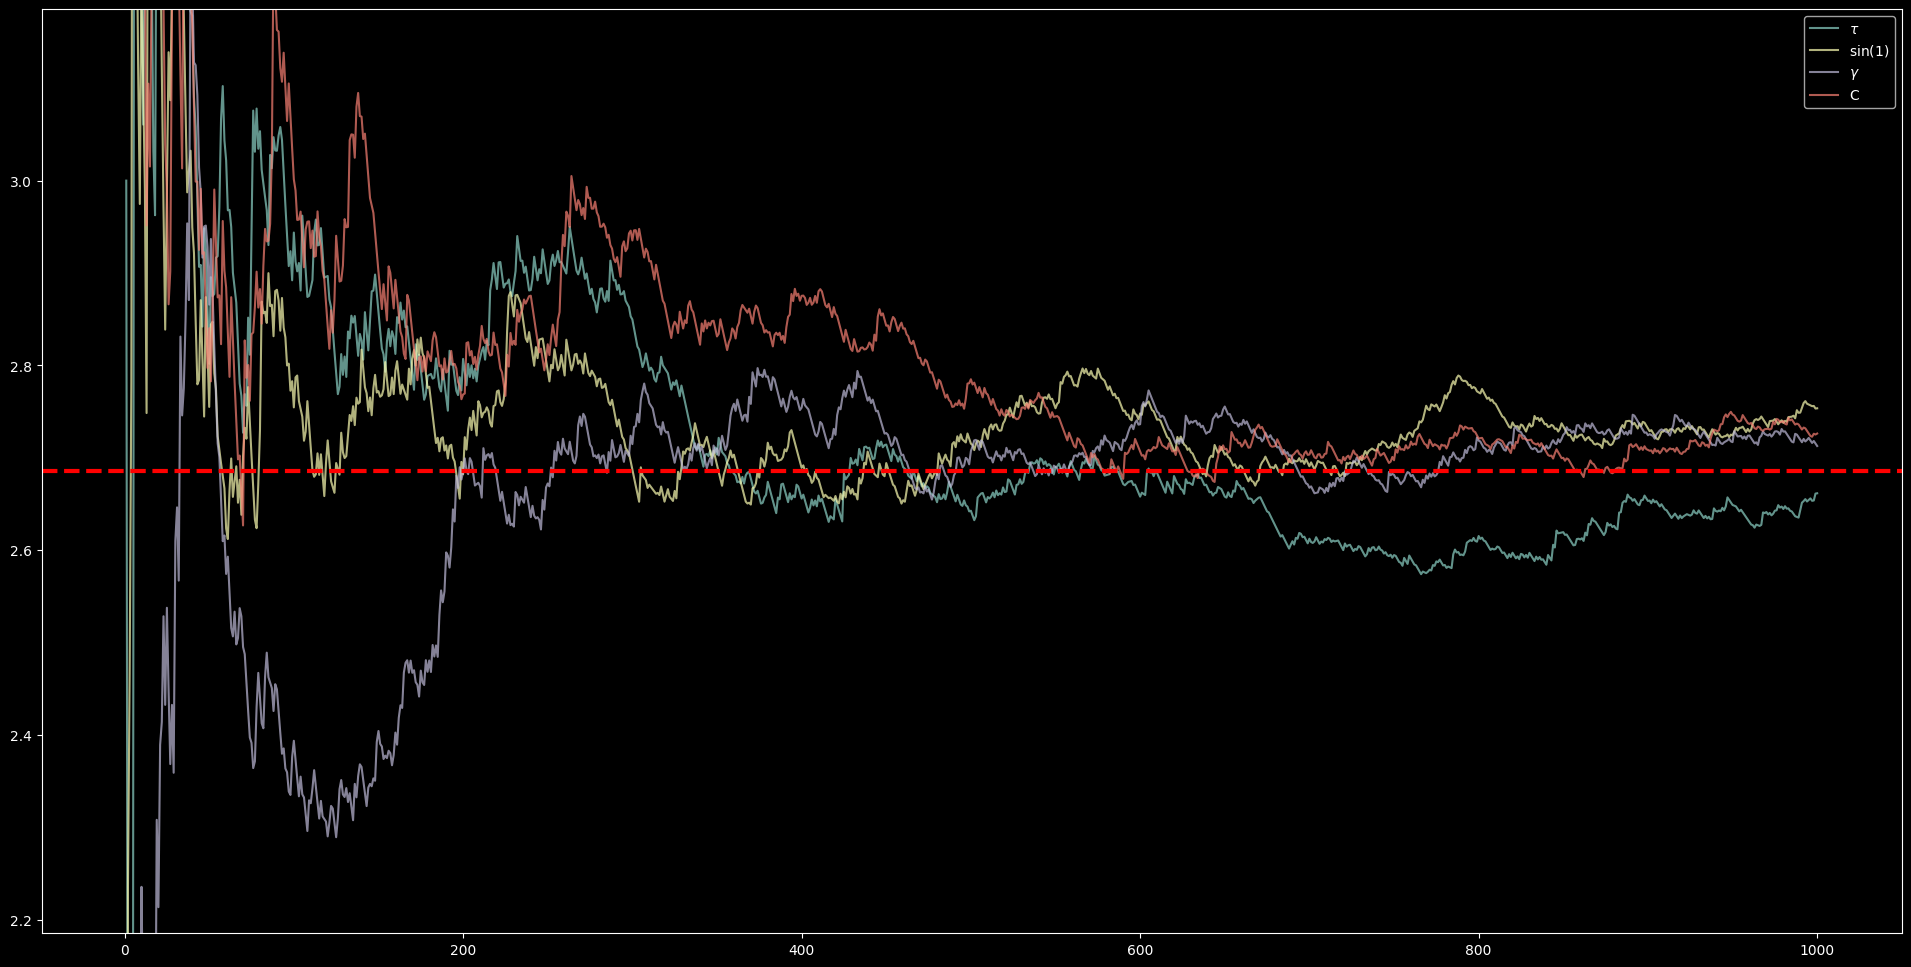

In [7]:
fig, axs = plt.subplots(figsize=(24,12))
a = 0.7
n = 1000
line_x_points = np.arange(1, n+1)

C = '0.' + ''.join(map(str, sp.sieve[1:501]))  # Would already have more digits than 500.

labelled_lines = {
    r'$\tau$': tau,
    r'$\sin(1)$': +mp.sin(1),
    r'$\gamma$':+mp.euler,
    'C': mp.mpf(C),
    # r'$K_0$': K,
    # r'$\beta(2)$': +mp.catalan,
    # r'$\zeta(3)$': +mp.apery,
    # 'A': +mp.glaisher,
    # 'M': +mp.mertens,
    # r'$\Pi_2$': +mp.twinprime,
}
labelled_lines = {label: compute_CF_GMs(c, n) for label, c in labelled_lines.items()}

for label, line in labelled_lines.items():
  plt.plot(line_x_points, line, label=label, alpha=a)
plt.axhline(K, color='r', linestyle='--', linewidth=3)
plt.ylim(float(K)-0.5, float(K)+0.5)
plt.legend()
plt.show()

In [8]:
from modules.visualize import animate_labelled_lines

In [9]:
anim = animate_labelled_lines(line_x_points, labelled_lines)
FFWriter = animation.FFMpegWriter(fps=15)
anim.save('../animations/consts_conv.mp4', writer=FFWriter)
plt.close()

  0%|          | 1/1000 [00:00<?, ?it/s]

### Constants which definitely do not have the property to tend to $K_0$

CF with diverging geomtric mean:
- $e$

CF with converging geomtric mean:
- $\phi$ -> 1
- $\sqrt{3}$ -> $\sqrt{2}$
- $\sqrt{2}$ -> 2

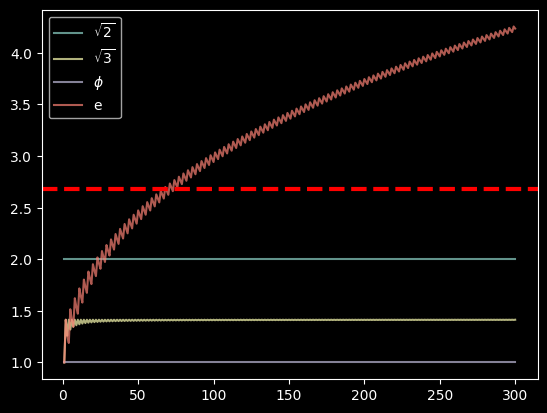

In [9]:
n = 300
line_x_points = np.arange(1, 1+n)

labelled_lines = {
    r'$\sqrt{2}$': mp.sqrt(2),
    r'$\sqrt{3}$': mp.sqrt(3),
    r'$\phi$': +mp.phi,
    r'e': +mp.e,
}
labelled_lines = {label: compute_CF_GMs(c, n) for label, c in labelled_lines.items()}

for label, line in labelled_lines.items():
  plt.plot(line_x_points, line, label=label, alpha=a)
plt.axhline(K, color='r', linestyle='--', linewidth=3)
plt.legend()
plt.show()

In [12]:
anim = animate_labelled_lines(line_x_points, labelled_lines, y_window=float(K)-1)
FFWriter = animation.FFMpegWriter(fps=15)
anim.save('../animations/consts_div.mp4', writer=FFWriter)
plt.close()

  0%|          | 1/300 [00:00<?, ?it/s]

### Constants formed using concatenation

#### Champernowne constant (not sure)

https://en.wikipedia.org/wiki/Champernowne_constant \
https://mathworld.wolfram.com/ChampernowneConstant.html

$C_{10} = 0.12345678910111213141516...$

In [ ]:
C_10 = '0.' + ''.join(map(str, range(1,500)))  # Would already have more digits than 500.
C_10 = mp.mpf(C_10)
champ_coeffs = compute_cf(C_10, 1001)
print('Continued fraction coefficients')
print(champ_coeffs[1:])
print('The next coeff has 166 digits.')
print('\nGeometric mean of continued fraction coefficients')
compute_cum_GM(champ_coeffs[1:])

Continued fraction coefficients
[     8      9      1 149083      1      1      1      4      1      1
      1      3      4      1      1      1     15]
The next coeff has 166 digits.

Geometric mean of continued fraction coefficients


array([ 8.        ,  8.48528137,  4.16016765, 57.23875185, 25.47722509,
       14.85229055, 10.10169785,  8.9971006 ,  7.04841033,  5.7980514 ,
        4.94188668,  4.74054735,  4.67901017,  4.190693  ,  3.80890485,
        3.50348382,  3.81638813])

The `Champernowne constant` continued fraction contains sporadic very large terms, making the continued fraction difficult to calculate. \
Interestingly, the `Copeland-Erdős constant`, which is the decimal number obtained by concatenating the primes (instead of all the positive integers), has a well-behaved continued fraction that does not show the "large term" phenomenon.

#### Copeland-Erdős constant (probably)

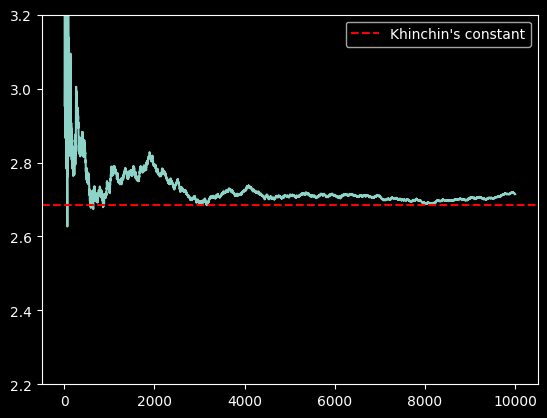

In [ ]:
import sympy as sp

x = '0.' + ''.join(map(str, sp.sieve[1:501]))  # Would already have more digits than 500.
x = mp.mpf(x)
plt.plot(compute_CF_GMs(x, 10000))
plt.axhline(K, color='r', linestyle='--', label="Khinchin's constant")
plt.ylim(2.2, 3.2)
plt.legend()
plt.show()

### Connection to Normal numbers

#### A Simply Normal number which does not have the property to tend to $K_0$

Any repeating decimal can be converted to a fraction. \
And rational numbers are known to not have the property to tend to $K_0$

$x = 0.\overline{0123456789}$ \
$10^{10}x = 123456789.\overline{0123456789}$ \
$10^{10}x - x = 123456789$ \
$x = \frac{123456789}{10^{10}-1}$

In [ ]:
x = '0.' + ''.join(map(str, list(range(10))*10))
x = mp.mpf(x)
x_coeffs = compute_cf(x, 1001)
print(x_coeffs)
print('Since the continued fraction terminates, the further terms would be all 0s resulting in a geometric mean of 0.')
x = compute_num_from_cf(x_coeffs)

# Sanity check.
mp.nprint(x, 27)
assert float(x) == 123456789/(1e10-1)

[      0      81 1371742      10]
Since the continued fraction terminates, the further terms would be all 0s resulting in a geometric mean of 0.
0.0123456789012345678901234568


#### Simply Abnormal numbers which probably do have the property to tend to $K_0$

Numbers formed by concatenating `random` `0`s and `1`s probably do have the property to tend to $K_0.$

If considered in `base 2` they would be simply normal (also normal) numbers but if considered in `base 10` they would be simply abnormal.

Note that there is a difference between considering a `base 2` number to be in `base 10` and converting a `base 2` number to `base 10`.

$0.\overline{10}_2 = 0.\bar6_{10}$ \
$0.\overline{10}_{10} = 0.00011001110110111..._{2}$

In [ ]:
num_lines, num_coeffs = 300, 10000
nums = []
for _ in range(num_lines):
  num = '0.' + ''.join(map(str, np.random.randint(0,2,500)))
  nums.append(mp.mpf(num))
nums = sorted(nums)

mean_lines = []
for num in tqdm(nums):
  mean_lines.append(compute_CF_GMs(num, num_coeffs))
mean_lines = np.array(mean_lines)
avg_mean_lines = mean_lines.mean(axis=0)

  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
print(float(abs(K - avg_mean_lines[-1])))

0.004278777201330867


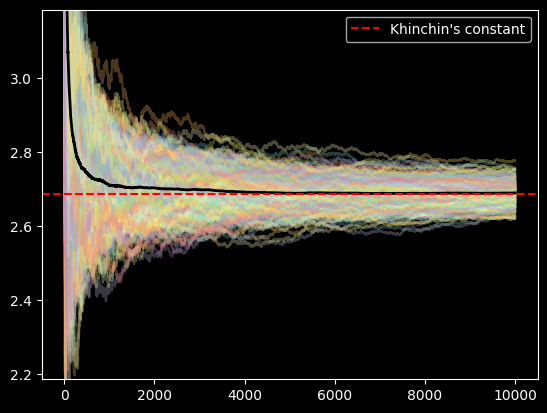

In [ ]:
# fig, axs = plt.subplots(figsize=(24,12))
for mean_line in mean_lines:
  plt.plot(mean_line, alpha=0.3)
plt.plot(avg_mean_lines, c='k', linewidth=2)
plt.axhline(K, color='r', linestyle='--', label="Khinchin's constant")
plt.ylim(float(K)-0.5, float(K)+0.5)
plt.legend()
plt.show()

#### Simply normal `vs` Normal `vs` Absolutely Normal

Simply Normal number \
$0.\overline{0123456789}$ is Simply Normal in base 10 because every digit has 1/10 probability so the digits are uniformly distributed.\
But it is not Normal in base 10 because it does not contain all combinations of digits. For starters, it does not contain 11.

 \
Normal number \
The Champernowne constant ($C_{10} = 0.12345678910111213141516...$) is an example of a Normal number in base 10. \
Similarly ($C_{2} = 0.11011100101110111...$) is normal in base 2. \
But they have not been proven to be normal in other bases. That is, we do do not know if $C_{10}$ is Normal in base 9 ($0.10888888853823..._9$) or other bases for that matter.

 \
Absolutely Normal number \
An absolutely normal number is a number which is Normal for every base $\geq 2$. \
I do not know if $C_{10}$ is also Normal when converted to other bases.

 \
Absolutely Abnormal number \
A number is absolutely abnormal if it is not simply normal in any base.

Example of an Absolutely Abnormal Number

f(n) = 4 if n=2 else $n^\frac{f(n-1)}{n-1}$ \
$$
\alpha = \prod_{n=2}^\infty\left( 1 - \frac{1}{f(m)} \right) =
\left( 1 - \frac{1}{4} \right)
\left( 1 - \frac{1}{9} \right)
\left( 1 - \frac{1}{64} \right)
\left( 1 - \frac{1}{152587890625} \right)
\left( 1 - \frac{1}{6^{(5^15)}} \right)
\cdots = 0.6562499999956991...
$$
The `1` is followed by `23,747,291,559` number of `9`s.

In [ ]:
f = lambda n: 4 if n==2 else n**(f(n-1)/(n-1))
alpha = np.prod(list(map(lambda m: 1-1/f(m), range(2,6))))
alpha

0.6562499999956992

#### Thoughts

- There are some Normal numbers whose continued fraction expansion does not follow the Gauss-Kuzmin distribution in the limit. \

- We know that $\sqrt2$, $\phi$ and $e$ don't follow the Gauss-Kuzmin distribution, so if those numbers are normal then it would prove the point above.